## AMAT 250: Problem Set 2

### Item 1A
Simulate a repeated prisoner's dilemma game where the number of repetitions of the game is arbitrary and depends on the user. <br> Try different scenarios where players defer or cooperate all the time, or a player's move depends on the other player's previous action(s). <br> The choice of player characteristics can be random or can be chosen by the user. <br> Please indicate the payoff matrix that you used.

______

### Some assumptions for this simulation

**The prisoners’ dilemma:** <br>Two bank robbers P1 and P2 are arrested. In absence
of a confession, the attorney can only prove the illegal possession of weapons
(three years of incarceration for each). So he offers each of them
(independently and without any possibility existing that the two can
communicate in order to coordinate anything) a guarantee that if a full and
truthful confession is made then, as chief witness, only 1 year will be served
while the other one if continuing to plead innocence suffers the full
punishment (let this be 9 years here). To make it interesting, should both
confess then both will get 7 years.

#### 1. Player

- P1 - Player 1 (Row player)
- P2 - Player 2 (Column player)

#### 2. Pay-off Matrix
Here is the pay-off matrix to be used in this simulation.

|              	| Player 2   	|          	|          	|
|--------------	|------------	|----------	|----------	|
| **Player 1** 	| Strategies 	| CONFESS  	| DENY     	|
|              	| CONFESS    	| (-7, -7) 	| (-1, -9) 	|
|              	| DENY       	| (-9, -1) 	| (-3, -3) 	|

#### 3. Strategies
There are multiple strategies each player can do. For this simulation, we will limit it to the four below.
 - Strategy 1 - Always confess
 - Strategy 2 - Always deny
 - Strategy 3 - Alternate (confess first, then deny)
 - Strategy 4 - Confess but retailiate if the other player previously deny
 - Strategy 5 - Randomly confess or deny

#### 4. Rounds
The user will set the number of rounds before starting the game.

_______

### Create Python Functions for each process

In [1]:
# import libraries needed

%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

In [2]:
# selecting strategy
def strat_select(player_strat, player_history, other_player_history):
    if player_strat == 1:
        return strat1()
    elif player_strat == 2:
        return strat2()
    elif player_strat == 3:
        return strat3(player_history)
    elif player_strat == 4:
        return strat4(other_player_history)
    elif player_strat == 5:
        return strat5()
    else:
        print("Invalid strategy")

In [3]:
# strategy name
def print_strat(player_strat):
    if player_strat == 1:
        return "always confess"
    elif player_strat == 2:
        return "always deny"
    elif player_strat == 3:
        return "alternately confess and deny"
    elif player_strat == 4:
        return "cooperate but retaliate"
    elif player_strat == 5:
        return "randomly confess or deny"

In [4]:
# always confess
def strat1():
    return "C"

In [5]:
# always deny
def strat2():
    return "D"

In [6]:
# alternately confess and deny
def strat3(player_history):
    if len(player_history) == 0:
        return "C"
    elif player_history[-1] == "C":
        return "D"
    else:
        return "C"

In [7]:
# confess but retaliate if other player denied previously
def strat4(other_player_history):
    if len(other_player_history) == 0:
        return "C"
    elif other_player_history[-1] == "D":
        return "D"
    else:
        return "C"

In [8]:
# randomly confess or deny
def strat5():
    randomizer = random.randint(0,1)
    if randomizer == 0:
        return "C"
    else:
        return "D"

In [9]:
# Pay-off calculations for a player
def player_pay_off(player_history, other_player_history):
    player_payoff = []
    for i in range(0, len(player_history)):
        if player_history[i] == "C" and other_player_history[i] == "C":
            player_pay = -7
        elif player_history[i] == "C" and other_player_history[i] == "D":
            player_pay = -1
        elif player_history[i] == "D" and other_player_history[i] == "C":
            player_pay = -9
        elif player_history[i] == "D" and other_player_history[i] == "C":
            player_pay = -3
        player_payoff.append(player_pay)
        #print(player_pay)
    return player_payoff

___________

### Main Gameplay Code

In [10]:
# Initializing the number of rounds for the game
print("Hello! Welcome to this simulation of a repeated prisoner's dilemma")
rounds = int(input("How many rounds do you want to play?\n"))

Hello! Welcome to this simulation of a repeated prisoner's dilemma
How many rounds do you want to play?
15


In [11]:
# Selecting the strategy for Player 1

print("**Player 1 Strategy**")
print("Select the strategy you want for player 1.")
print("""
 - Strategy 1 - Always cooperate
 - Strategy 2 - Always defect
 - Strategy 3 - Alternate (cooperate first, then defect)
 - Strategy 4 - Cooperate but retailiate if the other player previously defect
 - Strategy 5 - Randomly confess or deny
""")
P1_strat = 0
while P1_strat < 1 or P1_strat > 5:
    P1_strat = int(input("Type only the number of strategy (i.e., 1, 2, 3, 4 or 5)\n"))

**Player 1 Strategy**
Select the strategy you want for player 1.

 - Strategy 1 - Always cooperate
 - Strategy 2 - Always defect
 - Strategy 3 - Alternate (cooperate first, then defect)
 - Strategy 4 - Cooperate but retailiate if the other player previously defect
 - Strategy 5 - Randomly confess or deny

Type only the number of strategy (i.e., 1, 2, 3, 4 or 5)
5


In [12]:
# Selecting the strategy for Player 2

print("**Player 2 Strategy**")
print("Select the strategy you want for player 2.")
print("""
 - Strategy 1 - Always cooperate
 - Strategy 2 - Always defect
 - Strategy 3 - Alternate (cooperate first, then defect)
 - Strategy 4 - Cooperate but retailiate if the other player previously defect
""")
P2_strat = 0
while P2_strat < 1 or P2_strat > 5:
    P2_strat = int(input("Type only the number of strategy (i.e., 1, 2, 3, 4 or 5)\n"))

**Player 2 Strategy**
Select the strategy you want for player 2.

 - Strategy 1 - Always cooperate
 - Strategy 2 - Always defect
 - Strategy 3 - Alternate (cooperate first, then defect)
 - Strategy 4 - Cooperate but retailiate if the other player previously defect

Type only the number of strategy (i.e., 1, 2, 3, 4 or 5)
4


In [13]:
p1_strat_name = print_strat(P1_strat)
p2_strat_name = print_strat(P2_strat)
print(f"Player 1 will {p1_strat_name}, while Player 2 will {p2_strat_name}.")

Player 1 will randomly confess or deny, while Player 2 will cooperate but retaliate.


In [14]:
# initialize player move history
P1_history = []
P2_history = []

In [15]:
# Game play proper
for r in range(0, rounds):
    p1_move = strat_select(P1_strat, P1_history, P2_history)
    p2_move = strat_select(P2_strat, P2_history, P1_history)
    P1_history.append(p1_move)
    P2_history.append(p2_move)
print("C - confess, D - Deny\n")
print(f"Here are the moves done by Player 1, \t{P1_history}\n")
print(f"While  the moves done by Player 2, \t{P2_history}")

C - confess, D - Deny

Here are the moves done by Player 1, 	['D', 'C', 'C', 'D', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'C', 'D', 'C', 'C']

While  the moves done by Player 2, 	['C', 'D', 'C', 'C', 'D', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'C', 'D', 'C']


### Pay-off Calculations

In [16]:
# Pay-off Calculations for each player
p1_payoff = player_pay_off(P1_history, P2_history)
p1_sum = sum(p1_payoff)
p1_ave = np.mean(p1_payoff)
p2_payoff = player_pay_off(P2_history, P1_history)
p2_sum = sum(p2_payoff)
p2_ave = np.mean(p2_payoff)

print(f"Here are the pay-offs by Player 1, \t{p1_payoff} with a sum of {p1_sum} and average pay-off per round {round(p1_ave, 3)}.\n")
print(f"While  the pay-offs by Player 2, \t{p2_payoff} with a sum of {p2_sum} and average pay-off per round {round(p1_ave, 3)}.")

Here are the pay-offs by Player 1, 	[-9, -1, -7, -9, -1, -7, -7, -7, -7, -7, -9, -1, -9, -1, -7] with a sum of -89 and average pay-off per round -5.933.

While  the pay-offs by Player 2, 	[-1, -9, -7, -1, -9, -7, -7, -7, -7, -7, -1, -9, -1, -9, -7] with a sum of -89 and average pay-off per round -5.933.


In [17]:
# creating data tables for each player
p1 = pd.DataFrame([P1_history, p1_payoff, np.array(p1_payoff).cumsum()], 
                  index=["Move", "Pay-Off", "Cumulative Pay-off"], columns=np.arange(1, len(p1_payoff)+1))
p1_df = p1.T
p2 = pd.DataFrame([P2_history, p2_payoff, np.array(p2_payoff).cumsum()], 
                  index=["Move", "Pay-Off", "Cumulative Pay-off"], columns=np.arange(1, len(p2_payoff)+1))
p2_df = p2.T

In [18]:
p1_new = p1_df.reset_index()
p1_data = p1_new.rename(columns={"index": "Round #"})
p1_data

,Round #,Move,Pay-Off,Cumulative Pay-off
0,1,D,-9,-9
1,2,C,-1,-10
2,3,C,-7,-17
3,4,D,-9,-26
4,5,C,-1,-27
5,6,C,-7,-34
6,7,C,-7,-41
7,8,C,-7,-48
8,9,C,-7,-55
9,10,C,-7,-62


In [19]:
p2_new = p2_df.reset_index()
p2_data = p2_new.rename(columns={"index": "Round #"})
p2_data

,Round #,Move,Pay-Off,Cumulative Pay-off
0,1,C,-1,-1
1,2,D,-9,-10
2,3,C,-7,-17
3,4,C,-1,-18
4,5,D,-9,-27
5,6,C,-7,-34
6,7,C,-7,-41
7,8,C,-7,-48
8,9,C,-7,-55
9,10,C,-7,-62


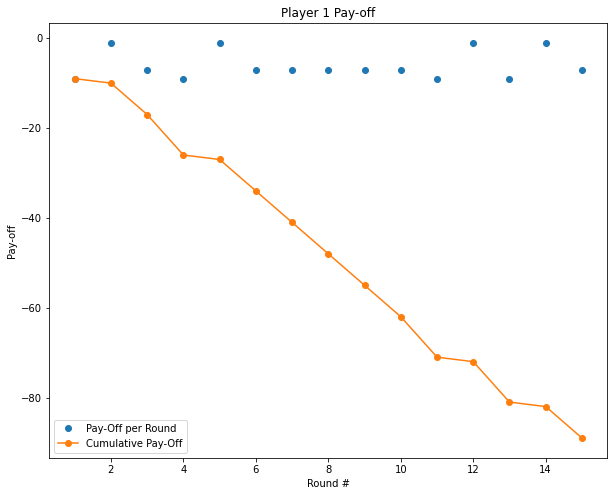

In [20]:
# Visualizing the Pay-off for Player 1
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(p1_data["Round #"], p1_data["Pay-Off"], label="Pay-Off per Round", marker='o', linestyle='None')
ax.plot(p1_data["Round #"], p1_data["Cumulative Pay-off"], label="Cumulative Pay-Off", marker='o',)

# x-axis label
ax.set_xlabel("Round #")

# y-axis label
ax.set_ylabel("Pay-off")

# graph title
ax.set_title("Player 1 Pay-off")

plt.legend()
plt.show()

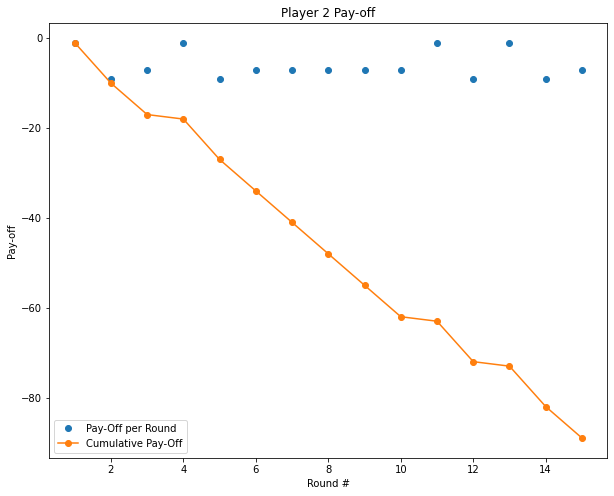

In [21]:
# Visualizing the Pay-off for Player 2
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(p2_data["Round #"], p2_data["Pay-Off"], label="Pay-Off per Round", marker='o', linestyle='None')
ax.plot(p2_data["Round #"], p2_data["Cumulative Pay-off"], label="Cumulative Pay-Off", marker='o',)

# x-axis label
ax.set_xlabel("Round #")

# y-axis label
ax.set_ylabel("Pay-off")

# graph title
ax.set_title("Player 2 Pay-off")

plt.legend()
plt.show()